## Imports

In [27]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pickle
import seaborn as sns
import os
import pandas as pd


In [28]:
# Plots configuration.

from tueplots import axes as tue_axes
from tueplots import cycler as tue_cycler
from tueplots import fonts as tue_fonts
from tueplots.constants import markers as tue_markers
from tueplots.constants.color import palettes as tue_palettes

plt.rcParams.update({"figure.dpi": 80})
plt.rcParams.update(tue_axes.spines(left=True, right=False, top=False, bottom=True))
plt.rcParams.update(tue_axes.grid())
plt.rcParams.update(tue_cycler.cycler(color=tue_palettes.high_contrast))
plt.rcParams.update(tue_axes.legend(shadow=False, frameon=False, fancybox=False))
plt.rcParams.update(tue_fonts.neurips2021_tex(family="sans-serif"))

## Load the data

In [29]:
# Define the paths where to read the results.
data_path = "/users/csb/huizing/Documents/PhD/Code/mowgli_reproducibility/data/"
mofa_path = os.path.join(data_path, "10X_PBMC_10k/scores_mofa.pkl")
nmf_path = "/users/csb/huizing/Documents/PhD/Code/mowgli_reproducibility/evaluate/scores_nmf.pkl"
mowgli_path = os.path.join(data_path, "10X_PBMC_10k/scores_mowgli.pkl")
seurat_path = os.path.join(data_path, "10X_PBMC_10k/scores_seurat.pkl")

# Load the results from the pickle files.
with open(mofa_path, "rb") as f:
    scores_dict_mofa = pickle.load(f)
with open(nmf_path, "rb") as f:
    scores_dict_nmf = pickle.load(f)
with open(mowgli_path, "rb") as f:
    scores_dict_mowgli = pickle.load(f)
with open(seurat_path, "rb") as f:
    scores_dict_seurat = pickle.load(f)

# Fuse two dictionaries.
scores_dict = {
    **scores_dict_mofa,
    **scores_dict_nmf,
    **scores_dict_mowgli,
    **scores_dict_seurat,
}


In [30]:
# Turn the scores into a dataframe.
scores_df = pd.DataFrame(scores_dict).T

In [31]:
# Add some columns.

idx = scores_df.index.to_series().str.contains("mofa")
scores_df.loc[idx, "Method"] = "MOFA+"

idx = scores_df.index.to_series().str.contains("nmf")
scores_df.loc[idx, "Method"] = "NMF"

idx = scores_df.index.to_series().str.contains("mowgli")
scores_df.loc[idx, "Method"] = "Mowgli"

idx = scores_df.index.to_series().str.contains("seurat")
scores_df.loc[idx, "Method"] = "Seurat"

idx = scores_df.index.to_series().str.contains("pbmc")
scores_df.loc[idx, "Dataset"] = "10X PBMC"

idx = scores_df.index.to_series().str.contains("liu")
scores_df.loc[idx, "Dataset"] = "Liu"

idx = scores_df.index.to_series().str.contains("sim1")
scores_df.loc[idx, "Dataset"] = "Simulated 1"

idx = scores_df.index.to_series().str.contains("sim2")
scores_df.loc[idx, "Dataset"] = "Simulated 2"

idx = scores_df.index.to_series().str.contains("sim3")
scores_df.loc[idx, "Dataset"] = "Simulated 3"

idx = scores_df.index.to_series().str.contains("sim4")
scores_df.loc[idx, "Dataset"] = "Simulated 4"

idx = scores_df.index.to_series().str.contains("sim5")
scores_df.loc[idx, "Dataset"] = "Simulated 5"

idx = scores_df.index.to_series().str.contains("bmcite")
scores_df.loc[idx, "Dataset"] = "Bone Marrow CITE-seq"

idx = scores_df.index.to_series().str.contains("opcite")
scores_df.loc[idx, "Dataset"] = "Open Problems CITE-seq"

idx = scores_df.index.to_series().str.contains("opmultiome")
scores_df.loc[idx, "Dataset"] = "Open Problems Multiome"

idx = scores_df.index.to_series().str.contains("15")
scores_df.loc[idx, "Latent dimension"] = "15"

idx = scores_df.index.to_series().str.contains("30")
scores_df.loc[idx, "Latent dimension"] = "30"

idx = scores_df.index.to_series().str.contains("50")
scores_df.loc[idx, "Latent dimension"] = "50"

In [32]:
# Print the head of the dataframe.
scores_df.head()

,Silhouette score,Purity scores,k range,ARIs,res_range,ARIs after denoising,Method,Dataset,Latent dimension
pbmc_mofa_15,0.358907,"[0.9225321888412559, 0.9212982832618382, 0.921...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.7347246442560976, 0.7871058117845379, 0.768...","[0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6,...","[0.7857166404920114, 0.7801271017987409, 0.704...",MOFA+,10X PBMC,15
pbmc_mofa_30,0.305522,"[0.9241416309013418, 0.9208154506438104, 0.919...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.6296626250407192, 0.7937682452217845, 0.743...","[0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6,...","[0.6752499081826121, 0.7898834081858246, 0.747...",MOFA+,10X PBMC,30
pbmc_mofa_50,0.298408,"[0.921030042918509, 0.9203862660944547, 0.9195...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.6562768696943939, 0.7795193974390501, 0.801...","[0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6,...","[0.6735824555769804, 0.797807001921298, 0.7579...",MOFA+,10X PBMC,50
bmcite_nmf_50,0.048629,"[0.7762641344831546, 0.7741166996610745, 0.772...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.3841868604791102, 0.6480214744741178, 0.649...","[0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6,...","[0.4951784700672006, 0.6510859620689524, 0.668...",NMF,Bone Marrow CITE-seq,50
liu_nmf_50,0.154865,"[0.9951456310679608, 0.9951456310679608, 0.990...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.6493874820436428, 0.9733025059356565, 0.986...","[0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6,...","[0.9475911030995424, 0.9475911030995424, 0.947...",NMF,Liu,50


In [33]:
# Make a new dataframe with individual ARI scores for each resolution.

ari_res = []  # Initialize the list that will be turned into a dataframe.

# Iterate over experiments.
for xp_name in scores_df.index:

    # Iterate over resolutions.
    for i, res in enumerate(scores_df.loc[xp_name, "res_range"]):

        # Add the ARI to the list.
        ari_res.append(
            {
                "xp_name": xp_name,
                "Dataset": scores_df.loc[xp_name, "Dataset"],
                "Method": scores_df.loc[xp_name, "Method"],
                "Latent dimension": str(scores_df.loc[xp_name, "Latent dimension"]),
                "Resolution": res,
                "ARI": scores_df.loc[xp_name, "ARIs"][i],
            }
        )

# Turn the list into a dataframe.
ari_res = pd.DataFrame(ari_res)


In [34]:
# Make a new dataframe with individual purity scores depending on k.

purity_res = [] # Initialize the list that will be turned into a dataframe.

# Iterate over experiments.
for xp_name in scores_df.index:

    # Iterate over k nearest neighbours.
    for i, k in enumerate(scores_df.loc[xp_name, "k range"]):

        # Add the purity score to the list.
        purity_res.append({
            "xp_name": xp_name,
            "Dataset": scores_df.loc[xp_name, "Dataset"],
            "Method": scores_df.loc[xp_name, "Method"],
            "Latent dimension": str(scores_df.loc[xp_name, "Latent dimension"]),
            "k": k,
            "Purity score": scores_df.loc[xp_name, "Purity scores"][i]
        })

# Turn the list into a dataframe.
purity_res = pd.DataFrame(purity_res)

## Supplementary figure 1 -- MOFA depending on latent dimension

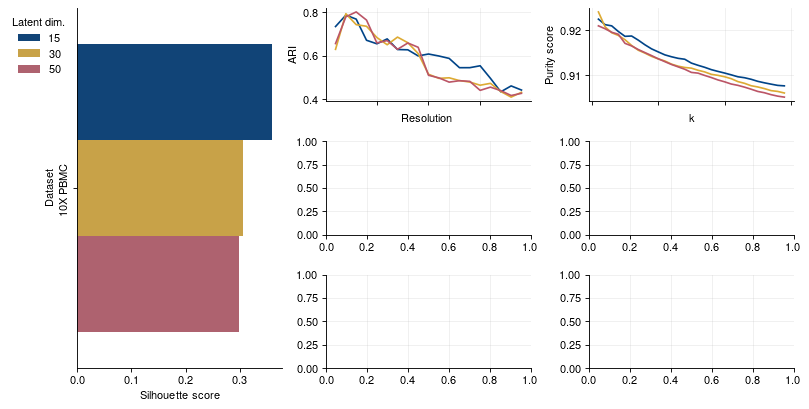

In [35]:
# Define the subplots.
fig = plt.figure(constrained_layout=True, figsize=(10, 5))
axes = fig.subplot_mosaic(
    """
    ABC
    ADE
    AFG
    """
)

# Visualize the silhouette score as a bar plot.
sns.barplot(
    data=scores_df.loc[scores_df["Method"] == "MOFA+"],
    y="Dataset",
    x="Silhouette score",
    hue="Latent dimension",
    ax=axes["A"],
)
axes["A"].legend(
    title="Latent dim.",
    bbox_to_anchor=(0, 1),
    ncol=1,
)
axes["A"].set_yticklabels(axes["A"].get_yticklabels(), rotation=90, va='center')


# Visualize the ARI as a line plot.
sns.lineplot(
    data=ari_res.loc[ari_res["Method"] == "MOFA+"],
    x="Resolution",
    y="ARI",
    hue="Latent dimension",
    ax=axes["B"],
)
axes["B"].set_xticklabels([])
axes["B"].get_legend().remove()

# Visualize the purity score as a line plot.
sns.lineplot(
    data=purity_res.loc[purity_res["Method"] == "MOFA+"],
    x="k",
    y="Purity score",
    hue="Latent dimension",
    ax=axes["C"],
)
axes["C"].set_xticklabels([])
axes["C"].get_legend().remove()

axes["B"].grid()
axes["C"].grid()
axes["D"].grid()
axes["E"].grid()
axes["F"].grid()
axes["G"].grid()


## Figure 1 -- All methods

pbmc_mofa_15          True
pbmc_mofa_30          True
pbmc_mofa_50          True
bmcite_nmf_50         True
liu_nmf_50            True
sim1_nmf_50          False
sim2_nmf_50          False
sim3_nmf_50          False
sim4_nmf_50          False
sim5_nmf_50          False
opcite_nmf_50         True
opmultiome_nmf_50     True
pbmc_nmf_50           True
pbmc_mowgli_50        True
pbmc_seurat           True
Name: Dataset, dtype: bool

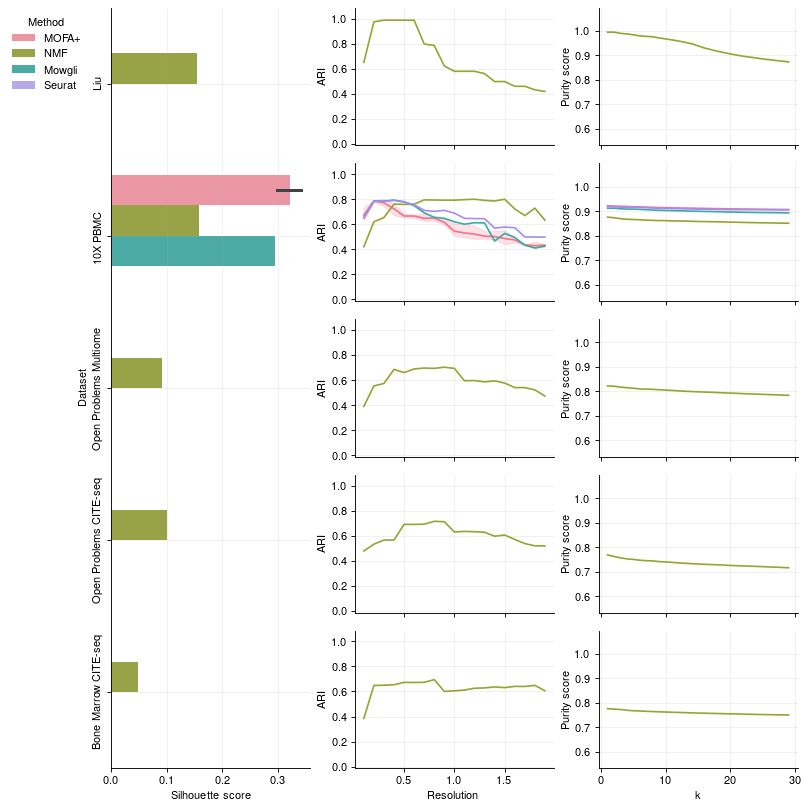

In [71]:
# List the datasets.
from turtle import title


datasets = [
    "Liu",
    "10X PBMC",
    "Open Problems Multiome",
    "Open Problems CITE-seq",
    "Bone Marrow CITE-seq",
]

for i in range(len(datasets)):
    idx = scores_df["Dataset"].str.contains(datasets[i])
    scores_df.loc[idx, "Order"] = i

# Define the subplots.
fig = plt.figure(constrained_layout=True, figsize=(10, 10))
axes = fig.subplot_mosaic(
    """
    ABC
    ADE
    AFG
    AHI
    AJK
    """
)

# Visualize the silhouette score as a bar plot.
idx = scores_df["Dataset"].str.contains("|".join(datasets))
sns.barplot(
    data=scores_df.loc[idx],
    y="Dataset",
    x="Silhouette score",
    hue="Method",
    hue_order=["MOFA+", "NMF", "Mowgli", "Seurat"],
    order=datasets,
    ax=axes["A"],
)
axes["A"].legend(
    title="Method",
    bbox_to_anchor=(-0.1, 1),
    ncol=1,
)
axes["A"].set_yticklabels(axes["A"].get_yticklabels(), rotation=90, va="center")

# Visualize the ARI as a line plot.
ymin = ari_res["ARI"].min()
ymax = ari_res["ARI"].max() + .1
for i, ax in enumerate([axes["B"], axes["D"], axes["F"], axes["H"], axes["J"]]):
    idx = ari_res["Dataset"].str.contains(datasets[i])
    sns.lineplot(
        data=ari_res.loc[idx],
        x="Resolution",
        y="ARI",
        hue="Method",
        hue_order=["MOFA+", "NMF", "Mowgli", "Seurat"],
        ax=ax,
    )
    ax.get_legend().remove()
    ax.set(ylim=(ymin, ymax))
    if i < len(datasets) - 1:
        ax.set_xticklabels([])
        ax.set(xlabel=None)

# Visualize the purity score as a line plot.
ymin = purity_res["Purity score"].min()
ymax = purity_res["Purity score"].max() + .1
for i, ax in enumerate([axes["C"], axes["E"], axes["G"], axes["I"], axes["K"]]):
    idx = purity_res["Dataset"].str.contains(datasets[i])
    sns.lineplot(
        data=purity_res.loc[idx],
        x="k",
        y="Purity score",
        hue="Method",
        hue_order=["MOFA+", "NMF", "Mowgli", "Seurat"],
        ax=ax,
    )
    ax.get_legend().remove()
    ax.set(ylim=(ymin, ymax))
    if i < len(datasets) - 1:
        ax.set_xticklabels([])
        ax.set(xlabel=None)

for i in axes:
    axes[i].grid()